In [2]:
# Import libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Practical Exercise 3 (Data organisation)

In this exercise we will organize the data for classification of an iris plant into one of the following three categories: (1) Iris Setosa, (2) Iris Versicolour and (3) Iris Virginica. Four plant attributes have been collected by R.A. Fisher in his classical paper: Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

These are:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

As raw data, we use ```data/iris_data.txt``` and ```data/iris_species.txt```. The former gives the measurements with the following implicit column headers: "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width". 50 measurements are provided for each class. The latter gives the class of the respective plant for which measurements are given in the same row in ```iris_data.txt```.

#### Tasks 1..5:

The **original tasks working with Octave** started with: Load the data and organize it into a 50-by-4-by-3 multidimensional array named iris. The first dimension (size: 50) labels the observations for each plant class, the second (size: 4) labels the 4 measurements given for each plant and the third (size: 3) labels the class.

With Python, it makes sense to work with **Pandas DataFrames**. This makes things a lot easier.

In [23]:
# Read txt file containing iris data, convert to numpy array:
iris = pd.read_csv("../../data/sheet3/iris_data.txt", sep='  ', header=None)

# Add column headers to name the features:
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Read txt file containing species:
species = pd.read_csv("../../data/sheet3/iris_species.txt", sep='  ', header=None)

# Add species as new column to iris data:
iris['Species'] = species

# Create array with observation numbers from 1..50 for all three species:
obs_n = np.array(range(1,51))
obs_n = np.concatenate([obs_n, obs_n, obs_n])

# Add observation numbers as new column to iris data:
iris['Observation'] = obs_n

# Check resulting data frame:
iris

/opt/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Observation
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,3
3,4.6,3.1,1.5,0.2,setosa,4
4,5.0,3.6,1.4,0.2,setosa,5
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,46
146,6.3,2.5,5.0,1.9,virginica,47
147,6.5,3.0,5.2,2.0,virginica,48
148,6.2,3.4,5.4,2.3,virginica,49


In [35]:
# Get mean and variance of all 4 features for all 3 species:
print('mean:')
print(iris.loc[:, iris.columns != 'Observation'].groupby('Species').mean())
print('\nvariance:')
print(iris.loc[:, iris.columns != 'Observation'].groupby('Species').var())

mean:
            Sepal Length  Sepal Width  Petal Length  Petal Width
Species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

variance:
            Sepal Length  Sepal Width  Petal Length  Petal Width
Species                                                         
setosa          0.124249     0.143690      0.030159     0.011106
versicolor      0.266433     0.098469      0.220816     0.039106
virginica       0.404343     0.104004      0.304588     0.075433


#### Task 6:

Generate scatter plots for the different subsets of data, e.g. visualize the distribution of data points for iris setosa and versicolor sepal length and width. Use different markers to illustrate the individual classes.

Label the axes appropriately, e.g. with “Sepal Length” and “Sepal Width”. Add an adequate title and legend.

In [51]:
# Create subsets for sepal length and width of iris setosa and versicolor:
sep_len_setosa = iris.loc[iris['Species'] == 'setosa', ['Sepal Length']].values
sep_wid_setosa = iris.loc[iris['Species'] == 'setosa', ['Sepal Width']].values
sep_len_versicolor = iris.loc[iris['Species'] == 'versicolor', ['Sepal Length']].values
sep_wid_versicolor = iris.loc[iris['Species'] == 'versicolor', ['Sepal Width']].values

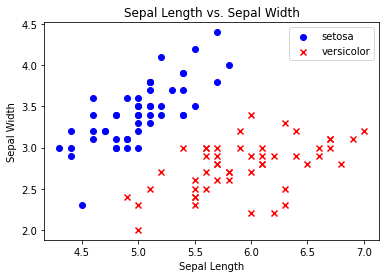

In [61]:
plt.scatter(x=sep_len_setosa, y=sep_wid_setosa, c='blue', marker='o', label='setosa')
plt.scatter(x=sep_len_versicolor, y=sep_wid_versicolor, c='red', marker='x', label='versicolor')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()